# Report 1: The Collatz Conjecture

The Collatz conjecture is a famous unsolved problem in mathematics. The problem involves taking a positive integer $n$ and constructing a sequence as follows: If $n$ is even, take the next term in the sequence to be $n/2$. If $n$ is odd, then the next term is $3n + 1$. The conjecture is that this sequence will always terminate in a 1 if started from a positive number. For example, starting on $n = 6$ yields the sequence 6, 3, 10, 5, 16, 8, 4, 2, 1. Note that once the sequence hits the number 1, it will proceed to cycle through the 4, 2, 1, 4, 2, 1... Looping behavior like this is important in our explorations here and we develop how to deal with it in code bellow.



This report explores 4 topics:

1. Generating the sequence for both positive and negative numbers


2. Plotting termination time


3. Exploring terminating cycles


4. Generalizations of the the algorithm, and plotting corresponding results

## Generating functions

The function below generates the Collatz sequence for any integer, and then formatted output is printed. 

In [2]:
def collatz(n, halt=1000):
    '''
    This function take any integer n and prints a list of the Collatz
    sequence starting at n. This makes use of a running list and
    implements a hard cutoff 'halt' limit. Since the sequence repeats
    once it hits 1, the while loop implemented checks both that we
    haven't reached 1, and that we're still below the halt limit. If
    either fails, then the code stops, whichever happens first.
    '''
    
    # Initialize runnig list, and step counter
    L = [n]
    last_term = n
    steps = 0
    
    # As menitioned, this will fail whenever any or both of the two
    # conditions below fail
    while (last_term != 1) and (steps < halt):
        
        # Play the game:
        if last_term % 2 == 0:
            last_term = last_term//2
        else:
            last_term = last_term*3 + 1
        
        # update the last term variable, and increment the step counter
        L.append(last_term)
        steps += 1
    
    # Loop through list to make a nice printable string of the sequence 
    list_string = ''
    for x in L:
        list_string += str(x) + ", "
    
    # Chopping off the string at the last two characters removes the
    # unfortunate extra ", " from the above
    if (steps == halt) and (L[-1] != 1):
        print("HALTED Collatz with n = {}: {}".format(n, list_string[:-2]))
    else:
        print("Collatz with n = {}: {}".format(n, list_string[:-2]))

The function works well both when 1 is hit, and when forced to abort after a halt limit. For example, see the two cases:

In [3]:
collatz(7)

Collatz with n = 7: 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1


In [7]:
collatz(-5, halt=15)

HALTED Collatz with n = -5: -5, -14, -7, -20, -10, -5, -14, -7, -20, -10, -5, -14, -7, -20, -10, -5


## Termination time

The conjecture is that the sequence terminates for all positive inputs. If this is the case, *how fast* do these sequences terminate. We construct the floowing function to test this:

In [15]:
def halting_steps(n):
    '''
    This function takes a positive integer n and retruns the number of
    steps the Collatz sequence takes to terminate.
    '''
    
    if n <= 0:
        print("Please enter a postive number!")
        return
    
    L, last_term = [n], n
    
    while last_term != 1:
        if last_term % 2 == 0:
            last_term = last_term//2
        else:
            last_term = 3*last_term + 1
            
        L.append(last_term)
    
    return len(L)-1

The numbers $n=2, ..., 20$ terminate in the following number of steps: 1, 7, 2, 5, 8, 16, 3, 19, 6, 14, 9, 9, 17, 17, 4, 12, 20, 20, 7. There are a few patterns to call to attention. First, these numbers often come in pairs. For example the sequence starting from both $n=12$ *and* $n=13$ terminates in 9 steps. This pattern continued regularly later into the sequence as well, and the lengths of the consecutive terms got longer too. The second observance is that, even for large $n$, the termination time remains very small. The following code shows that there are only 4 integers less than 1000000 who's termination time is more than 500:

In [ ]:
for i in range(1,1000000):
    if halting_steps(i) > 500:
        print(halting_steps(i))

508, 503, 524, 506

We would like to see the global behavior of this function. Is, for example, the function bounded in some way? What shape does the data take on? To explore this, we import numpy and matplotlib to graph the `halting_steps` function.

In [16]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def plot_halting(end, start=1):
    '''
    This function plots the behavior of halting_steps(n) from n=start to n=end
    '''
    
    x_values = np.array(list(range(start,end+1)))
    y_list = []
    
    for x in range(start, end+1):
        y_list.append(halting_steps(x))
    
    y_values = np.array(y_list)
    
    plt.plot(x_values, y_values, 'g,')
    plt.title('Halting Steps')
    plt.show()

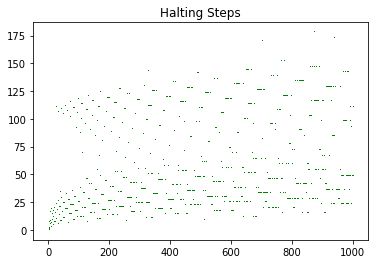

In [22]:
plot_halting(1000)

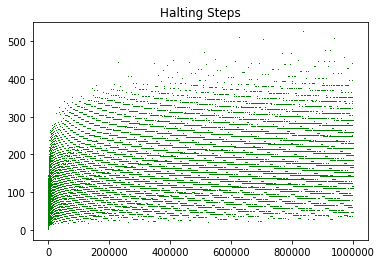

In [23]:
plot_halting(1000000)

This is a crazy picture! There are visual sugestions of logarithmic growth, and you can clarly see that the function rarely exceeds 500 in the 1 to 1000000 case, as mentioned.

## Negative inputs and terminating cycles

There was something interesting in the sequences starting from negative numbers: while they never reached 1, they entered into finite loops of terms. In a sense, we could consider these as terminations themseleves. A conjecture then, is:

**Conjecture:** Every negative sequence terminates in a loop.

Moreover, if this is true, we can ask:

**Question:** What are the possible cycle *lengths*?

To explore this, we build a function to generate the Collatz sequence starting from a negative number. Specifically, we need code to deal with identifying cylces, and terminating where appropriate.

In [25]:
def negative_cycle(n, verbose=True):
    '''
    This function constructs the negative Collatz sequence in two steps:
    generating the sequence untill a repeat is hit, then generating the
    cycle that occurs from that repeat. This function also makes use of
    a 'verbose' parameter, which if silent alows us to plot the lengths
    of the cylces arrived at in code following.
    '''
    
    if n > 0:
        print("Error: This function takes a negative number n.")
        return
    
    L, last_term = [n], n
    steps = 0
    
    # Part 1: Build the sequence till we hit a repeat then pass the
    # repeat on to part 2
    while True:
        # Play the game
        if last_term % 2 == 0:
            next_term = last_term // 2
        else:
            next_term = 3*last_term + 1
        
        # If a cycle is started, kill the loop and initialize the cycle
        if next_term in L:
            cycle_start = next_term
            break
        else:
            L.append(next_term)
            last_term = next_term
            steps += 1

    # Part 2: Build the list of the cycle
    cycle_list = [cycle_start]
    cycle_current = cycle_start
    
    while True:
        if cycle_current % 2 == 0:
            cycle_current = cycle_current // 2
        else:
            cycle_current = 3*cycle_current + 1
        
        # If we return to the start of the cycle, break
        if cycle_current == cycle_start:
            break
        else:
            cycle_list.append(cycle_current)
    
    # Part 3: Print or return the results
    if verbose:
        print("Negative Collatz on n = {}. Cycle length {} at index {}:\n{:s}".format(n, len(cycle_list), steps, str(cycle_list)))
    else:
        return len(cycle_list)

In [29]:
negative_cycle(-17)

Negative Collatz on n = -17. Cycle length 18 at index 17:
[-17, -50, -25, -74, -37, -110, -55, -164, -82, -41, -122, -61, -182, -91, -272, -136, -68, -34]


As before, we can plot this function. Code is ommitted to save space, and it is exactly the same as the plotting function above. Something terrifying happens when we look at the sizes of the loops we end in. Here are the first million:

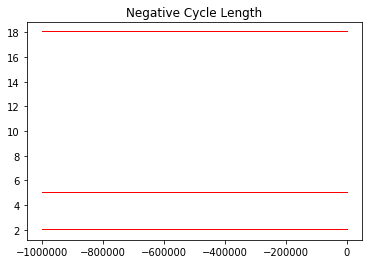

In [34]:
plot_cycle_length(-1000000)

It appears that there may only be terminating cycles of lengths 2, 5, and 18! Cracking it open further, there seems only one unique cycle of each length, up to cyclic permutation.

1. Length 2 first occurs at $n=-1$: [-2, -1]


2. Lenth 5 first occurs at $n=-5$: [-5, -14, -7, -20, -10]


3. Lenth 18 first occurs at $n=-17$: [-17, -50, -25, -74, -37, -110, -55, -164, -82, -41, -122, -61, -182, -91, -272, -136, -68, -34]

## Generalizations

The Collatz problem is sometimes refered to as the $3n+1$ conjecture. For this reason, we make the following generalization: For a fixed positive integer $M \geq 1$, if $n$ is odd, make the next term in the sequence $Mn + 1$, otherwise $n/2$ as before. We implement this in code below:

In [35]:
def general_collatz(n, multiple=3, halt=1000, verbose=True):
    '''
    This code generates the general Collatz sequence for a given multiple.
    If verbose is flase, we return the termination time. As convention for 
    use in later code, we return the integer -1 if the halt time was hit.
    '''
    
    L, last_term = [n], n
    steps = 0
    
    while (last_term != 1) and (steps < halt):
        if last_term % 2 == 0:
            last_term = last_term//2
        else:
            last_term = multiple*last_term + 1

        L.append(last_term)
        steps += 1
    
    if verbose:
        if (steps == halt) and (n != 1):
            print("HALTED {}-Collatz on n={}: {:s}".format(multiple, n, str(L)))
        else:
            print("{}-Collatz on n={}: {:s}".format(multiple, n, str(L)))
    
    else:
        if (steps == halt) and (n != 1):
            return -1
        else:
            return steps

In [36]:
general_collatz(3, multiple=5)

5-Collatz on n=3: [3, 16, 8, 4, 2, 1]


The $Mn + 1$ Collatz sequences seem to terminate *far* less often. Here are some images. Again plotting code is ommitted.

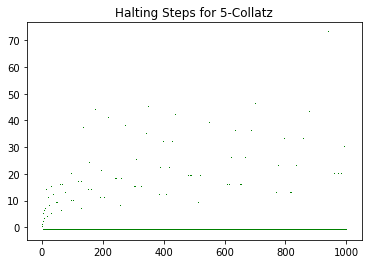

In [41]:
plot_general_halting(multiple=5, end=1000)

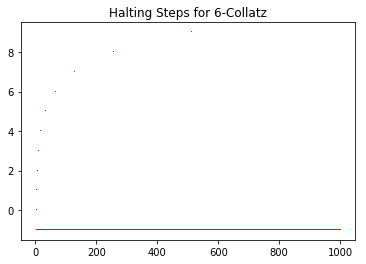

In [40]:
plot_general_halting(multiple=6, end=1000)

The logarithmic shape is still present though! In fact, we make the following claim about the general $Mn + 1$ collatz.

**Claim:** If $M$ is even, then the only numbers that terminate are the powers of 2, $2^k$.


*Proof:* If $n$ is a power of two, then it clearly terminates, as it just gets cut in half at each itteration. If n is odd, then the number $Mn + 1$ is odd and the sequence will proceed with the unbounded sequence $Mn+1, M(Mn+1) + 1, M(M(Mn+1)+1) + 1, \dots$. If $n$ is even but not a power of 2 then write $n = 2K$ for some $K$. As $n$ is not a power of 2, eventually we will have that $K/{2^t}$ is odd for some step $t$. The sequence the continues unbounded. This completes the proof.

## Conclusion

There is still a lot to examine. For example, I didn't look at the sugested `dropping_steps(n)` function, or other more general algorithms. But the evidence found thus far is compelling, and I'd like to explore it furhter!